In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
def getSeason(release_date):
    if (release_date[0:3] == "Dec" or  release_date[0:3] == "Jan" or release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar" or release_date[0:3] == "Apr" or release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun" or release_date[0:3] == "Jul" or release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    
season = budget.release_date.apply(getSeason)
budget['Season'] = season
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Fall


In [4]:
budget["Season"].value_counts()

Fall      1552
Winter    1484
Summer    1415
Spring    1331
Name: Season, dtype: int64

In [5]:
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')

budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0,Winter
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0,Fall


In [6]:
budget[['domestic_gross', 'production_budget']] = budget[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
budget = budget.drop(columns="worldwide_gross") #profit column

budget

,id,release_date,movie,production_budget,domestic_gross,Season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter
5778,79,"Apr 2, 1999",Following,6000,48482,Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,Fall


In [7]:
budget["profit"] = budget["domestic_gross"] - budget["production_budget"]
budget

,id,release_date,movie,production_budget,domestic_gross,Season,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,Winter,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Spring,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,303181382
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,Spring,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,Summer,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,Fall,-1400


Text(0.5, 1.0, 'Seasonal profit')

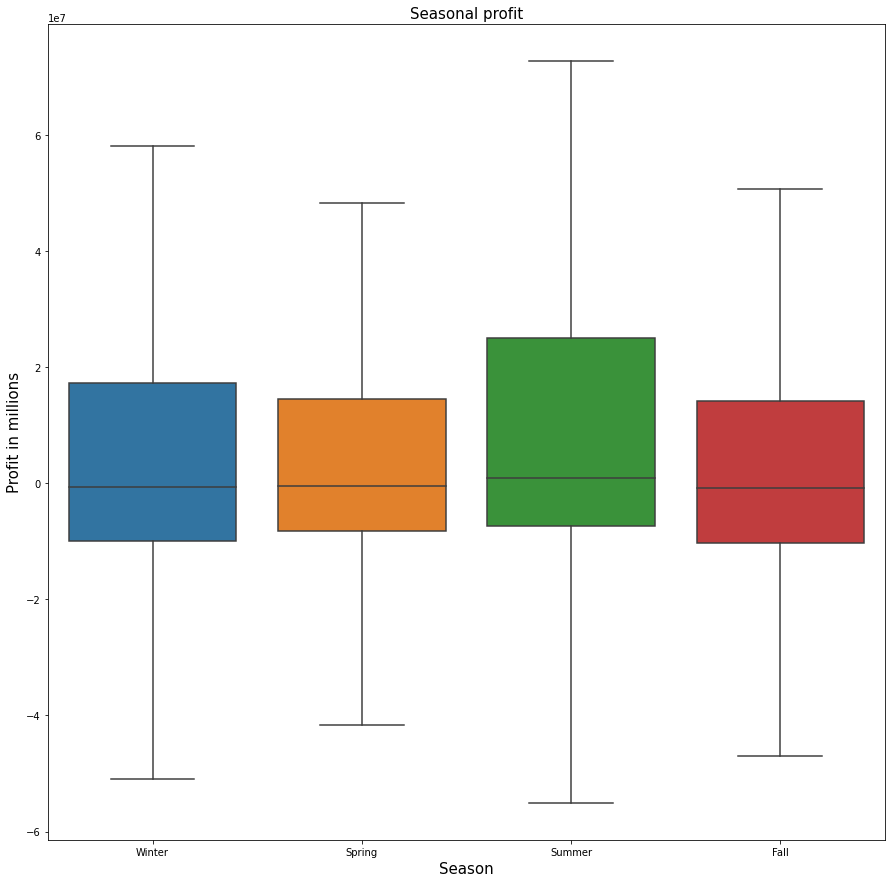

In [21]:
# Your code here
plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))

sns.boxplot(x='Season', y='profit', data=budget, ax=plot_five_ax, showfliers=False)

plot_five_ax.set_xlabel('Season', fontsize = 15)

plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)

plot_five_ax.set_title('Seasonal profit', fontsize = 15)